In [2]:
# Load libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def get_data():
    """
    Return boston dataset
    as x - predictor and
    y - response variable
    """
    data = load_boston()
    x = data['data']
    y = data['target']
    return x,y

def build_model(x,y,n_estimators=500):
    """
    Build a Gradient Boost regression model
    """
    model = GradientBoostingRegressor(n_estimators=n_estimators,verbose=10,\
    subsample = 0.7, learning_rate= 0.15,max_depth=3,random_state=77)
    model.fit(x,y)
    return model

def view_model(model):
    """
    """
    print("\n Training scores")
    print("======================\n")
    for i,score in enumerate(model.train_score_):
        print("\tEstimator %d score %0.3f"%(i+1,score))
    plt.cla()
    plt.figure(1)
    plt.plot(range(1,model.estimators_.shape[0]+1),model.train_score_)
    plt.xlabel("Model Sequence")
    plt.ylabel("Model Score")
    plt.show()
    print("\n Feature Importance")
    print("======================\n")
    for i,score in enumerate(model.feature_importances_):
        print("\tFeature %d Importance %0.3f"%(i+1,score))

def model_worth(true_y,predicted_y):
    """
    Evaluate the model
    """
    print("\tMean squared error = %0.2f"%(mean_squared_error(true_y,predicted_y)))
    


/root/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

      Iter       Train Loss      OOB Improve   Remaining Time 
         1          58.5054          20.8187            2.00s
         2          45.3236          10.3661            2.00s
         3          40.1397           8.8515            2.08s
         4          27.7994           8.2124            2.02s
         5          27.6201           4.1300            1.95s
         6          21.0184           3.9134            1.99s
         7          17.5886           2.6455            1.99s
         8          15.0434           2.3415            1.94s
         9          12.0217           1.8091            1.90s
        10          10.4117           1.4942            1.90s
        11           9.5270           0.7124            1.87s
        12           7.5068           0.6259            1.84s
        13           6.5587           0.3061            1.81s
        14           6.3918           0.3094            1.78s
        15           5.9403           0.1788            1.75s
       

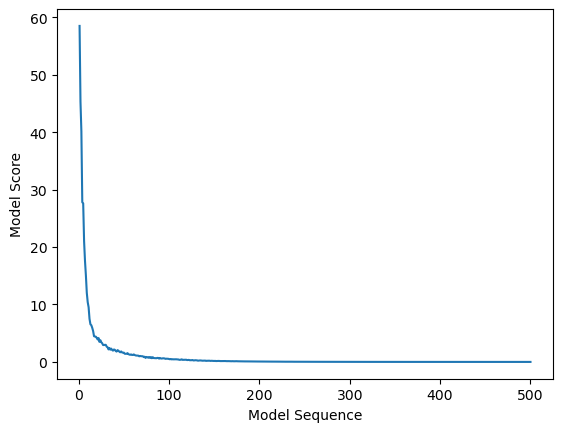


 Feature Importance

	Feature 1 Importance 0.000
	Feature 2 Importance 0.001
	Feature 3 Importance 0.000
	Feature 4 Importance 0.000
	Feature 5 Importance 0.000
	Feature 6 Importance 0.001
	Feature 7 Importance 0.309
	Feature 8 Importance 0.001
	Feature 9 Importance 0.008
	Feature 10 Importance 0.000
	Feature 11 Importance 0.001
	Feature 12 Importance 0.003
	Feature 13 Importance 0.002
	Feature 14 Importance 0.141
	Feature 15 Importance 0.000
	Feature 16 Importance 0.000
	Feature 17 Importance 0.000
	Feature 18 Importance 0.006
	Feature 19 Importance 0.007
	Feature 20 Importance 0.001
	Feature 21 Importance 0.001
	Feature 22 Importance 0.000
	Feature 23 Importance 0.000
	Feature 24 Importance 0.006
	Feature 25 Importance 0.002
	Feature 26 Importance 0.013
	Feature 27 Importance 0.000
	Feature 28 Importance 0.000
	Feature 29 Importance 0.000
	Feature 30 Importance 0.000
	Feature 31 Importance 0.002
	Feature 32 Importance 0.000
	Feature 33 Importance 0.000
	Feature 34 Importance 0.000
	

In [16]:
if __name__ == "__main__":
    x, y = get_data()
    
    #Divide the data into Train, dev and test
    x_train, x_test_all, y_train, y_test_all = train_test_split(x, y, test_size = 0.3, random_state=9)
    x_dev,x_test,y_dev,y_test = train_test_split(x_test_all,y_test_all,test_size=0.3,random_state=9)
    #Prepare some polymomial features
    poly_features = PolynomialFeatures(2, interaction_only=True)
    poly_features.fit(x_train)
    x_train_poly = poly_features.transform(x_train)
    x_dev_poly = poly_features.transform(x_dev)
    
    #Build modek with polynomial features
    model_poly = build_model(x_train_poly, y_train)
    predicted_y = model_poly.predict(x_train_poly)
    print("\nModel Performance in Training set (Polynomial features)\n", (model_worth(y_train, predicted_y)))
    
    #View model details
    view_model(model_poly)
    
    #Apply the model on dev set
    predicted_y = model_poly.predict(x_dev_poly)
    print("\n Model Performance in Dev set (Polynomial features)\n",model_worth(y_dev,predicted_y))
    
    #Apply the model on Test set
    x_test_poly = poly_features.transform(x_test)
    predicted_y = model_poly.predict(x_test_poly)
    print("\n Model Performance in Test set(Polynomial features)\n")
    model_worth(y_test, predicted_y)
    